# Vehicle Insurance Prediction: EDA and Modeling

## Problem Statement
Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.



## Goal

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# Exploratory Data Analysis

In [ ]:
# Importing data and packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style='darkgrid', font_scale=1, palette='mako')


In [3]:
train = pd.read_csv('../Vehicle Insurance/train.csv')
test = pd.read_csv('../Vehicle Insurance/test.csv')


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Duplicates

In [6]:
train.duplicated().sum()

0

In [7]:
test.duplicated().sum()

0

## Missing Values

In [8]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

## Visualisation of Features

### Resoponse

/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


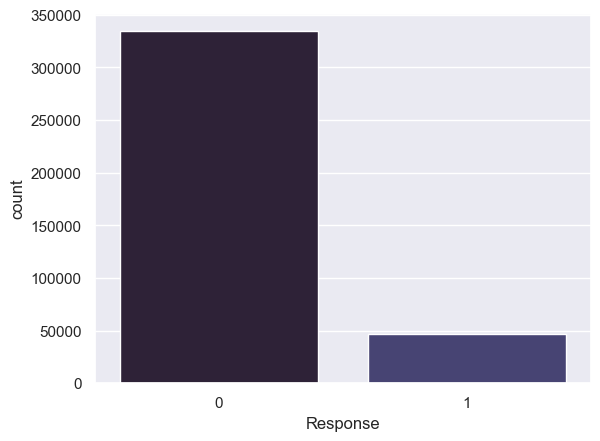

In [10]:
sns.countplot(train['Response']);

We can see here the vast majority of customers reponsed 0 which corresponds to the customer being intrested.

In [11]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

### Gender

/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


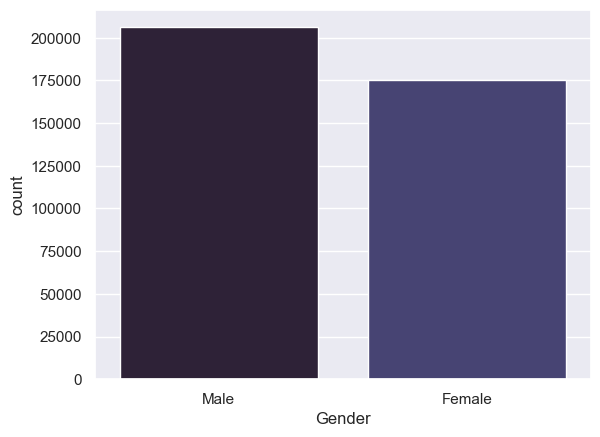

In [12]:
sns.countplot(train['Gender']);
plt.show()

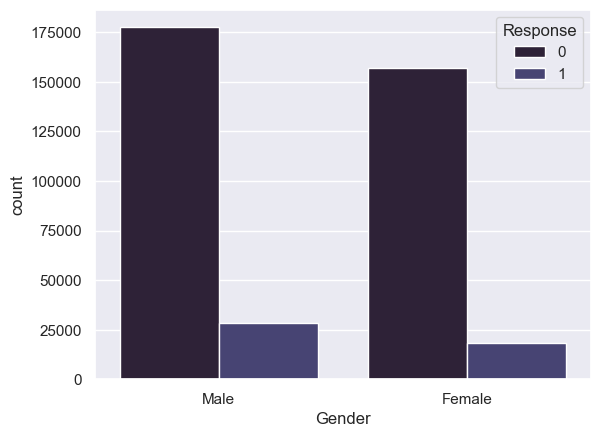

In [13]:
sns.countplot(x='Gender', hue='Response', data=train);

Slightly more customers are males. More males tend to be intrested in related products compared to females. 

### Age

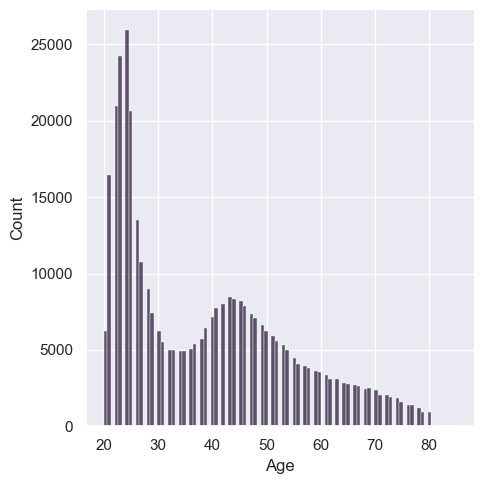

In [14]:
sns.displot(data=train, x='Age');

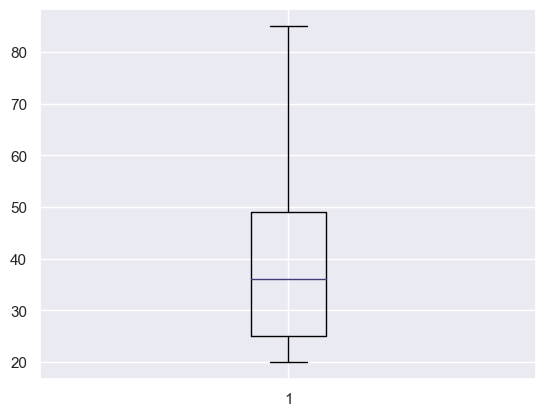

In [20]:
plt.boxplot(train['Age']);

In [27]:
train['Age'].mode()

0    24
Name: Age, dtype: int64

In [23]:
train['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

The customers range from age 20-85. The mean age of the group is 39 years of age, although we can see this is skewed by older customers.

### Driving Lisence

/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/ty/xzkrlw3n681fsxzmh9cl7wq00000gq/T/ipykernel_72372/327963070.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


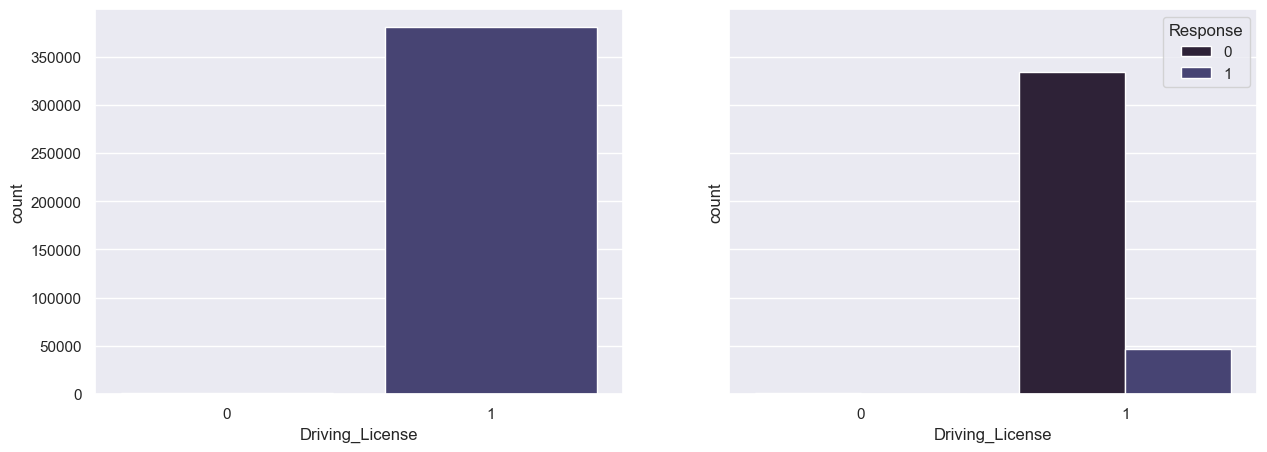

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(train['Driving_License'], ax=ax[0])
sns.countplot(x='Driving_License', hue='Response', data=train);


fig.show()

All customers who were interested possesed driving licenses. More males drive than women by a signigicant majority.

### Region Code

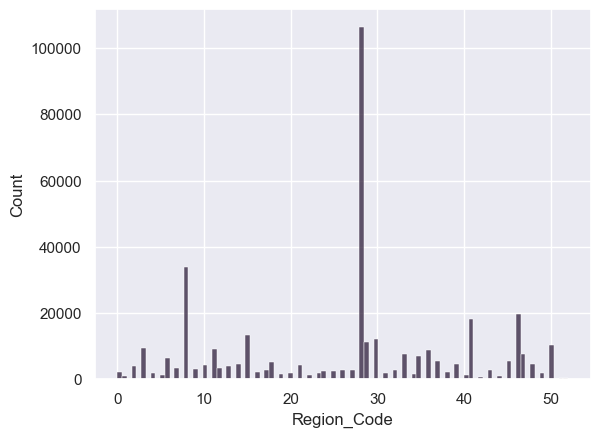

In [30]:
sns.histplot(data=train, x='Region_Code');

In [32]:
train['Region_Code'].value_counts().sort_values(ascending = False)

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

Most customers reside in region 28.

### Previously_Insured

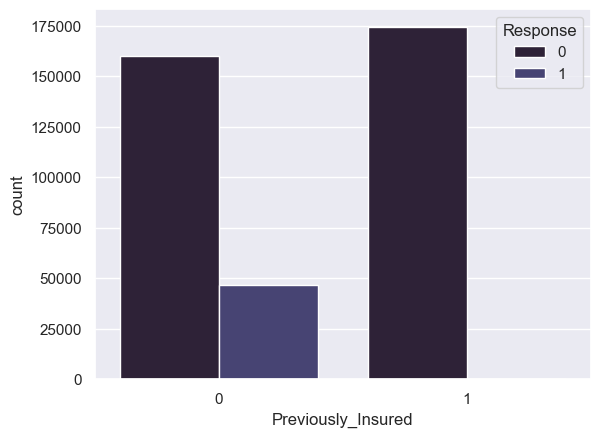

In [33]:
sns.countplot(x='Previously_Insured', hue='Response', data=train);

1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

Most people are not intrested, regardless of being insured or not. People who have been insured are 100% more likely to be intrested. We can see no one who was not previously insured accepted this offer.

### Vehicle_Age

/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


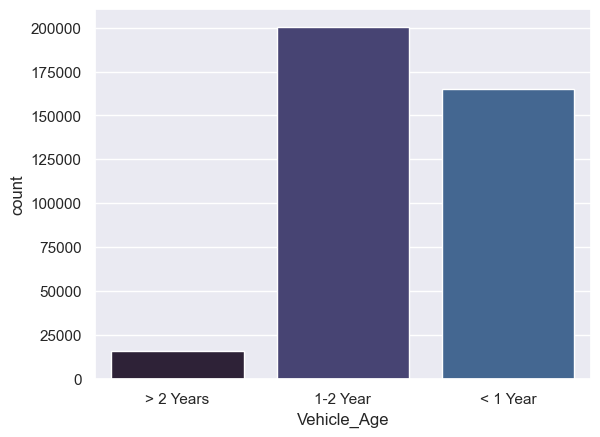

In [43]:
sns.countplot(train['Vehicle_Age']);

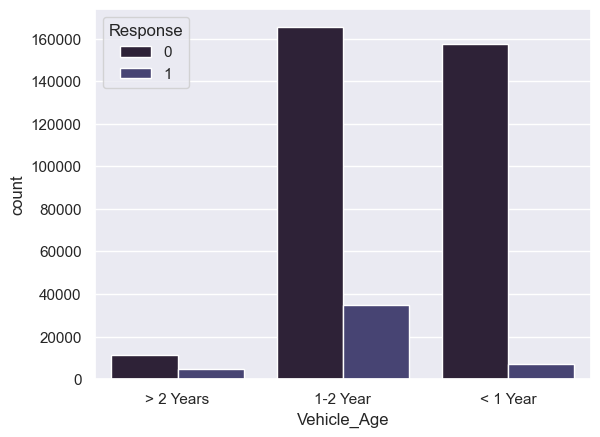

In [44]:
sns.countplot(data=train ,x='Vehicle_Age', hue='Response');

Most people on the register have vehicles of 1-2 years, these people are most likely to accept this new offer. However, vehicle age does not seem to be a major factor in response.

### Vehicle Damage

/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


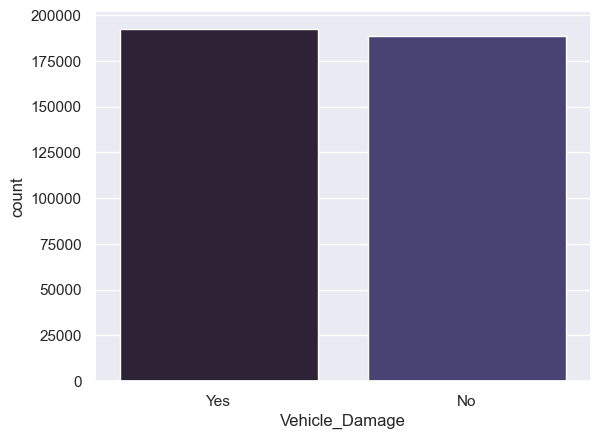

In [46]:
sns.countplot(train['Vehicle_Damage']);

In [47]:
veh_grouped = train.groupby(['Vehicle_Damage','Response']).count().reset_index()

In [48]:
veh_grouped

,Vehicle_Damage,Response,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage
0,No,0,187714,187714,187714,187714,187714,187714,187714,187714,187714,187714
1,No,1,982,982,982,982,982,982,982,982,982,982
2,Yes,0,146685,146685,146685,146685,146685,146685,146685,146685,146685,146685
3,Yes,1,45728,45728,45728,45728,45728,45728,45728,45728,45728,45728


In [49]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index();

In [50]:
df

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


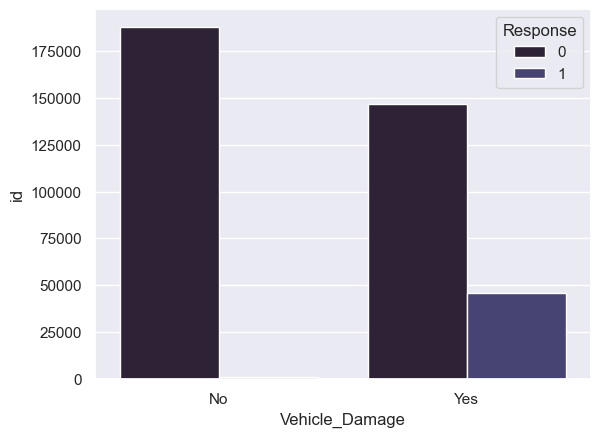

In [51]:
sns.barplot(data=veh_grouped ,x='Vehicle_Damage', hue='Response', y='id');


If a car has had previous damage they're 100% more likely to get their car insured now.

### Anual Premium

/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


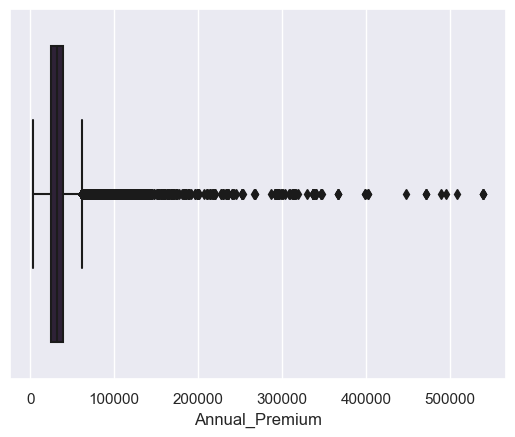

In [52]:
sns.boxplot(train['Annual_Premium']);

/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


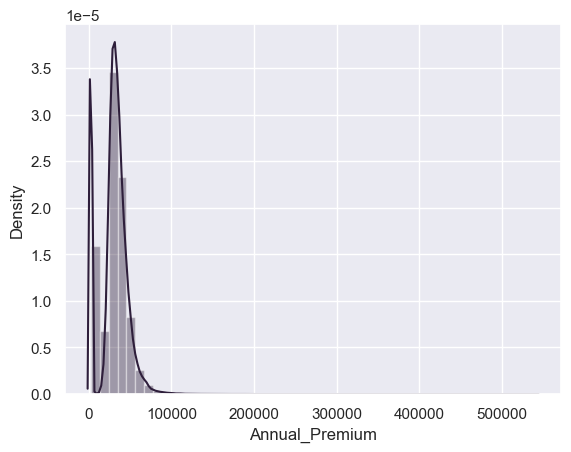

In [53]:
sns.distplot(train['Annual_Premium']);

Annual premium has many outliers, we could look into this later but I think this is a natural variation and will leave it in for this analysis.

### Vintage

In [54]:
train['Vintage'].value_counts()

256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64

/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


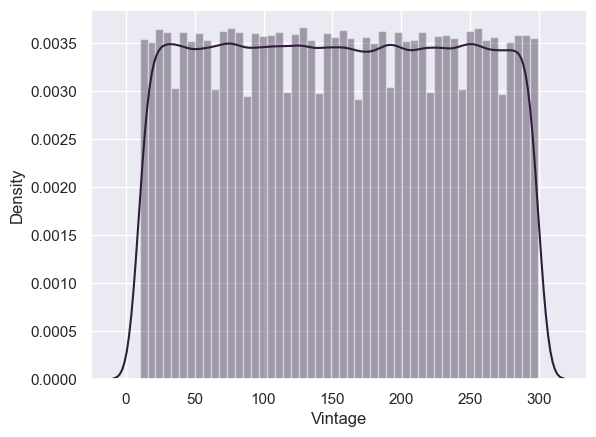

In [55]:
sns.distplot(train['Vintage']);


# Model

## Preprocessing

### Encoding

In [56]:
#encode gender
train['Gender'] = train['Gender'].map({'Male':1, 'Female':0})

In [57]:
test['Gender'] = test['Gender'].map({'Male':1, 'Female':0})

In [58]:
train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [59]:
#change vehicle age column
age_dict = { '1-2 Year': 0 , '< 1 Year':1, '> 2 Years':2}

In [60]:
train['Vehicle_Age'] = train['Vehicle_Age'].map(age_dict)

In [61]:
test['Vehicle_Age'] = test['Vehicle_Age'].map(age_dict)

In [62]:
train['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [63]:
#Vehicle damage
damage_dict = {'Yes':0 , 'No':1}
train['Vehicle_Damage'] = train['Vehicle_Damage'].map(damage_dict)


In [64]:
test['Vehicle_Damage'] = test['Vehicle_Damage'].map(damage_dict)

In [65]:
train['Vehicle_Damage'].value_counts()

0    192413
1    188696
Name: Vehicle_Damage, dtype: int64

In [66]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,0,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,1,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,0,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,1,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,1,27496.0,152.0,39,0


### Scaling

In [67]:
num_list = ['Age','Vintage']
cat_list = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [ ]:
#annual premium, do minmax
# plt.hist(train['Annual_Premium']);

In [68]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [69]:
scaler = MinMaxScaler()
train['Annual_Premium'] = scaler.fit_transform(train[['Annual_Premium']]) #fine [[]]???

In [70]:
stscaler = StandardScaler()
train[num_list] = stscaler.fit_transform(train[num_list])


In [71]:
# same for test
test['Annual_Premium'] = scaler.transform(test[['Annual_Premium']]) #only tansfom right????

In [72]:
test[num_list] = stscaler.transform(test[num_list])


### Splits

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X= train.drop(columns='Response')
y= train['Response']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Modelling

In [81]:
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

### Random Forest Classifier

#### Baseline

In [ ]:
# rfc = RandomForestClassifier()

In [ ]:
# rfc.fit(X_train, y_train)

In [ ]:
# rfc.score(X_test,y_test)

In [ ]:
# y_pred = rfc.predict(X_test)

In [ ]:
# cnf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# %matplotlib inline
# class_names=[False, True] # name  of classes
# fig, ax = plt.subplots(figsize=(4, 4))
# sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix')
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')
# tick_marks = [0.5, 1.5]
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)

#### Hyperparameter Tuning

In [ ]:
# grid = {'n_estimators': [0, 10, 20, 30],
#                'max_depth': [2, 4, 6],
#                'min_samples_split': [2, 5, 10],
#                'bootstrap': [True, False]}


In [ ]:
# rf_random = RandomizedSearchCV(estimator = rfc, 
#                                param_distributions = grid,
#                                n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)




In [ ]:
# rf_random.fit(X_train, y_train)


In [ ]:
# rf_random.best_params_


In [ ]:
# rf_random.best_estimator_

In [ ]:
# rf_random.score(X_test, y_test)

In [76]:
import pickle

In [ ]:
# #save this model
# filename = 'rfc_model_tuned.sav'
# pickle.dump(rf_random, open(filename, 'wb'))

In [77]:
filename = 'rfc_model_tuned.sav'
rf_load = pickle.load(open(filename, 'rb'))


In [78]:
rf_load

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [0, 10, 20, 30]},
                   random_state=42, verbose=2)

In [79]:
# y_pred=rf_random.predict(X_test)
y_pred = rf_load.predict(X_test)

In [82]:
cnf_matrix = confusion_matrix(y_test, y_pred)

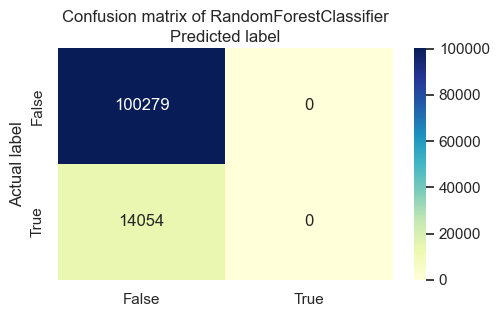

In [85]:
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g');
ax.xaxis.set_label_position("top");
plt.tight_layout();
plt.title('Confusion matrix of RandomForestClassifier');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
tick_marks = [0.5, 1.5];
plt.xticks(tick_marks, class_names);
plt.yticks(tick_marks, class_names);

In [86]:
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100279
           1       0.00      0.00      0.00     14054

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

#### ROC

The metric for this analysis is ROC so let us inspect:

In [90]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [91]:
y_score = rf_load.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)


In [92]:
auc_score = roc_auc_score(y_test, y_score)
auc_score

0.822421073141044

### XGBoost Model

In [93]:
from xgboost import XGBClassifier

#### Baseline

In [94]:
xgb = XGBClassifier()

In [95]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [96]:
xgb.score(X_test, y_test)

0.8761337496610777

In [97]:
y_pred = xgb.predict(X_test)

In [98]:
cnf_matrix_xgb = confusion_matrix(y_test, y_pred)

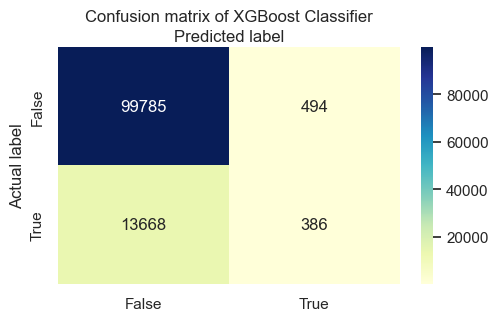

In [99]:
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(pd.DataFrame(cnf_matrix_xgb), annot=True, cmap="YlGnBu", fmt='g');
ax.xaxis.set_label_position("top");
plt.tight_layout();
plt.title('Confusion matrix of XGBoost Classifier');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
tick_marks = [0.5, 1.5];
plt.xticks(tick_marks, class_names);
plt.yticks(tick_marks, class_names);

In [100]:
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100279
           1       0.44      0.03      0.05     14054

    accuracy                           0.88    114333
   macro avg       0.66      0.51      0.49    114333
weighted avg       0.83      0.88      0.83    114333



In [101]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb,X_train,y_train,cv=5)

In [102]:
score.mean()

0.8768105102281207

#### ROC

In [103]:
y_score = xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)


In [104]:
auc_score = roc_auc_score(y_test, y_score)
auc_score

0.8541778261476722

In [105]:
xgb_proba=xgb.predict_proba(X_test)[:,1]

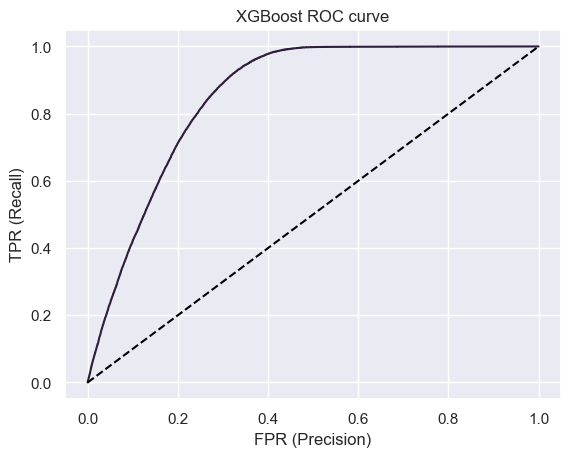

Area under curve (AUC):  0.85418


In [107]:
fpr, tpr, thresholds  = roc_curve(y_test, xgb_proba)


plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', format(round(auc(fpr,tpr),5)))

XGBoost outperforms RandomForestClassifer

#### Classification Report

In [111]:
from yellowbrick.classifier import ClassificationReport

In [112]:
def view_report(model,X,y):
    visualizer = ClassificationReport(
        model, classes=['0', '1'],
        cmap="YlGn", size=(600, 360)
    )
    visualizer.fit(X,y)
    visualizer.score(X,y)
    visualizer.show()

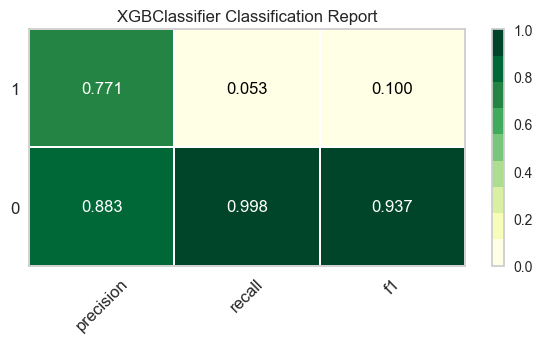

In [113]:
view_report(xgb, X_train, y_train)

In [119]:
#As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

#### Class Prediction Error

In [114]:
from yellowbrick.classifier import ClassPredictionError


In [115]:
def show_errors(model, X_train,y_train,X_test,y_test):
    classes=['Not Responded','Responded']
    visualizer = ClassPredictionError(model)

    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()


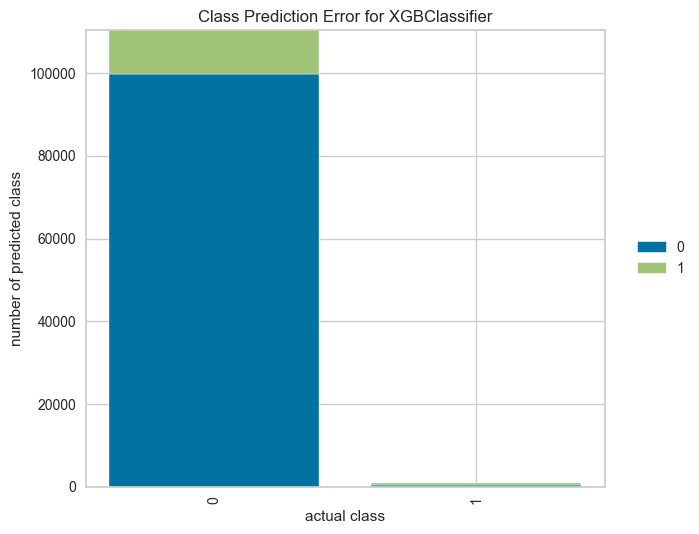

In [116]:
show_errors(xgb, X_train, y_train, X_test, y_test)

#### Discrimination Threshold

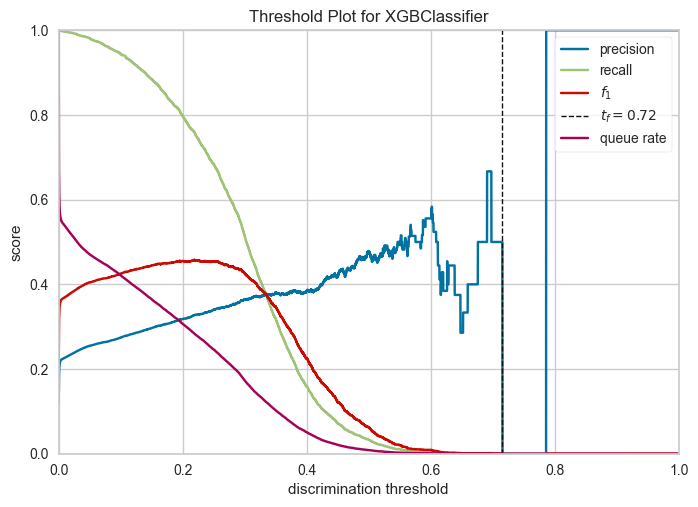

<AxesSubplot:title={'center':'Threshold Plot for XGBClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [117]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(xgb, n_trials=1,excludestr=['queue_rate'],random_state=55)
visualizer.fit(X_train, y_train)
visualizer.show()

### Submission Format

In [125]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,-0.891113,1,11.0,1,1,1,0.061682,152.0,-1.211258
1,381111,1,0.075906,1,28.0,0,0,0,0.057916,7.0,-0.518068
2,381112,1,0.527181,1,28.0,0,0,0,0.069614,124.0,0.533668
3,381113,1,-0.955581,1,27.0,1,1,0,0.064602,152.0,0.390249
4,381114,1,-0.762177,1,28.0,1,1,1,0.105048,152.0,1.704919


In [149]:
preds=xgb.predict_proba(test)[:,1]

In [155]:
submission = pd.DataFrame(preds ).set_index(test['id'])

In [160]:
submission.rename(columns={'id':'id', 0:'Response'}).head()

,Response
id,
381110,0.000285
381111,0.213758
381112,0.128660
381113,0.001846
381114,0.000829
